# Исследование объявлений о продаже квартир

Датасет содержит данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо определить рыночную стоимость объектов недвижимости, установив конкретные параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

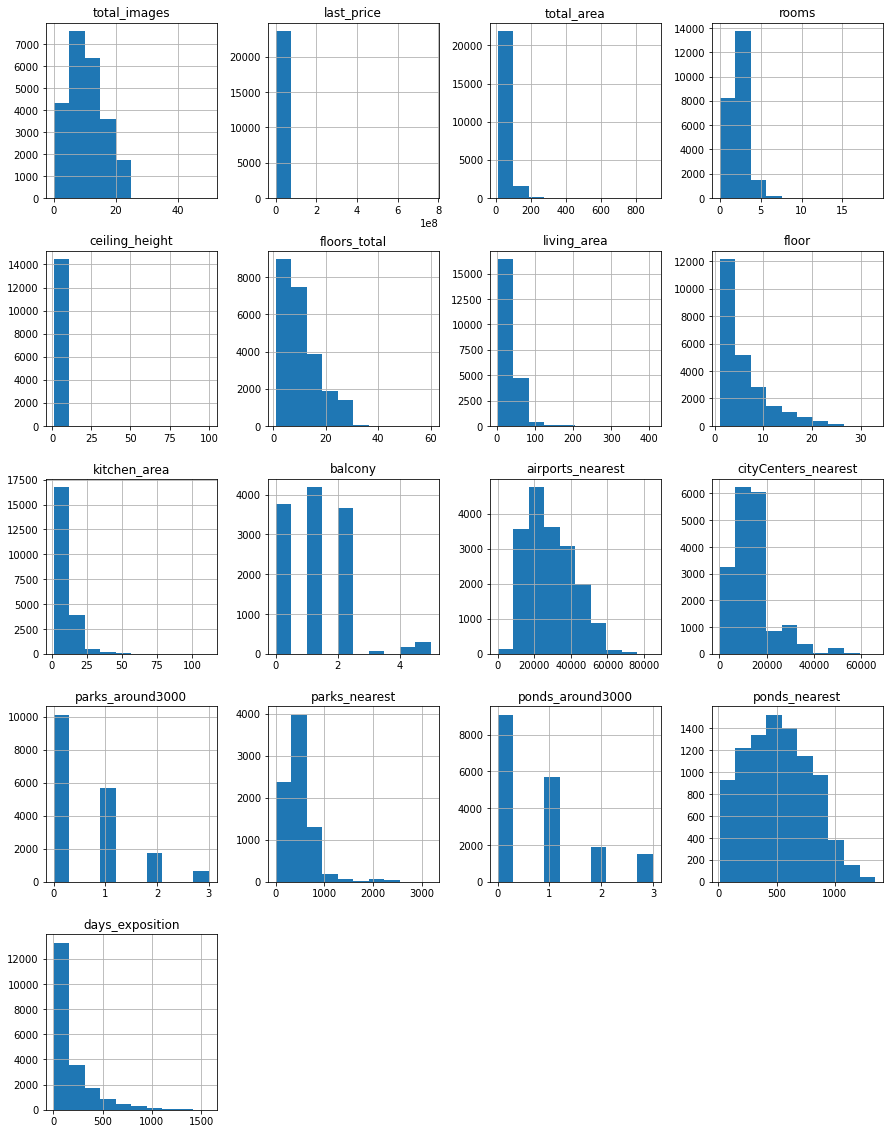

In [6]:
data.hist(figsize=(15,20))

Датасет содержит в себе добавленную пользователем и картографическую информацию о каждом объекте недвижимости, включая:
*	airports_nearest — расстояние до ближайшего аэропорта в метрах
*	balcony — число балконов
*	ceiling_height — высота потолков
*	cityCenters_nearest — расстояние до центра города
*	days_exposition — сколько дней было размещено объявление (от публикации до снятия)
*	first_day_exposition — дата публикации
*	floor — этаж
*	floors_total — всего этажей в доме
*	is_apartment — апартаменты
*	kitchen_area — площадь кухни в квадратных метрах
*	last_price — цена на момент снятия с публикации
*	living_area — жилая площадь в квадратных метрах
*	locality_name — название населённого пункта
*	open_plan — свободная планировка
*	parks_around3000 — число парков в радиусе 3 км
*	parks_nearest — расстояние до ближайшего парка
*	ponds_around3000 — число водоёмов в радиусе 3 км
*	ponds_nearest — расстояние до ближайшего водоёма
*	rooms — число комнат
*	studio — квартира-студия
*	total_area — общая площадь квартиры в квадратных метрах
*	total_images — число фотографий квартиры в объявлении


Среди представленных данных обращают на себя внимание пропуски в большинстве имеющихся колонок, а также несколько позиций требуют изменения типов данных. Помимо этого, по ряду признаков есть аномальные значения.
При этом, особенно много пропусков в столбцах:
* is_apartment
* ceiling_height
* balcony
* airports_nearest
* parks_around
* parks_nearest
* ponds_around3000
* ponds_nearest

### Предобработка данных

Работа с пропущенными значениями:

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Отсутсвтующую информацию о локации мы не можем заменить логически. Причина ее отсутствия не ясна, возможно, информацию либо забыли либо не хотели указывать. Введу отстутвия вариантов заполнения этих ячеек данными, информацию необходимо удалить.

In [8]:
data.dropna(subset=['locality_name'], inplace=True)

Пропуски в столбце balcony можно заменить на 0, так как скорее всего отстутствие информации о их количестве говорит о том, что их просто нет в представленных квартирах.

In [9]:
data['balcony'] = data['balcony'].fillna(0)

Также мы не сможем логически заполнить пропуски в столбце floors_total, поэтому удалим эти пропуски. Отстутствие данных в этой графе также можно связатьт с человеческим фактором.

In [10]:
data.dropna(subset=['floors_total'], inplace=True)

Отсутвующую информацию, касательно высоты потолков, можно заменить медианным значением по всему датасету:

In [11]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

Пропущенные значения жилой площади и площади кухни можно заменить на среднее по всему датасету, используя коэффициент ко всей площади:

In [12]:
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

Удалим отсутствующие значения из колонки days_exposition, поскольку они могут мешать дальнейшей работе с данными. 

In [13]:
data.dropna(subset=['days_exposition'], inplace=True)

Удалим отсутствующие значения из колонки parks_around3000, поскольку они могут мешать дальнейшей работе с данными.

In [14]:
data.dropna(subset=['parks_around3000'], inplace=True)

Удалим отсутствующие значения из колонки pons_around3000, поскольку они могут мешать дальнейшей работе с данными.

In [15]:
data.dropna(subset=['ponds_around3000'],inplace=True)

Столбец is_apartment мог появиться после того, как начали вести записи, поэтому вместо пропусков поставим False. В этом столбце также необходимо сменить тип данных на булевый:

In [16]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [18]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest          22
cityCenters_nearest        0
parks_around3000           0
parks_nearest           8870
ponds_around3000           0
ponds_nearest           7935
days_exposition            0
dtype: int64

Пропущенные значения в оставшихся колонках логически заполнить невозможно, поэтому оставим их как есть. Причиной отсутвтия в них данных может служить техническая ошибка. 

Изменение типов данных:

Колонка с данными о дате публикации имеет тип данных object. Необходимо сменить его на datetime:

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

Тип данных в колонках last_price, balcony, days_exposition, parks_around3000 и ponds_around3000 для удобной работы с ними лучше изменить с float на int:

In [20]:
data['balcony'] = data['balcony'].astype('int')

In [21]:
data['last_price'] = data['last_price'].astype('int')

In [22]:
data['days_exposition'] = data['days_exposition'].astype('int')

In [23]:
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [24]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')


Также изменим типы данных более эффективным способом, чтобы сэкономить память:

In [25]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: 
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 
    return "{:03.2f} MB".format(usage_mb)

data_int = data.select_dtypes(include=['int'])
converted_int = data_int.apply(pd.to_numeric,downcast='unsigned')

print(mem_usage(data_int))
print(mem_usage(converted_int))

compare_ints = pd.concat([data_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)


data_float = data.select_dtypes(include=['float'])
converted_float = data_float.apply(pd.to_numeric,downcast='float')

print(mem_usage(data_float))
print(mem_usage(converted_float))

compare_floats = pd.concat([data_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

1.08 MB
0.30 MB
1.20 MB
0.66 MB


,before,after
float32,NaN,9.0
float64,9.0,NaN


Обработка дубликатов:

In [26]:
data.duplicated().sum()

0

In [27]:
data['locality_name'].unique()

array(['посёлок Шушары', 'Санкт-Петербург', 'посёлок Парголово',
       'Ломоносов', 'Петергоф', 'Пушкин', 'Колпино', 'Кронштадт',
       'посёлок Металлострой', 'Павловск', 'Сестрорецк', 'Красное Село',
       'посёлок Понтонный', 'Зеленогорск', 'посёлок Стрельна',
       'посёлок Александровская', 'посёлок Песочный',
       'посёлок Петро-Славянка', 'посёлок Сапёрный', 'посёлок Молодёжное',
       'посёлок Репино', 'поселок Лисий Нос', 'посёлок Левашово',
       'посёлок Белоостров', 'посёлок Лисий Нос', 'посёлок Усть-Ижора'],
      dtype=object)

In [28]:
def locality_new_name(name):
    try:
        if 'Рябово' in name:
            return 'посёлок Рябово'
        elif 'Тельмана' in name:
            return 'посёлок Тельмана'
        elif 'Янино' in name:
            return 'городской посёлок Янино-1'
        elif 'Токсово' in name:
            return 'посёлок городского типа Токсово'
        elif 'Рощино' in name:
            return 'городской посёлок Рощино'
        elif 'Мурино' in  name:
            return 'Мурино'
        elif 'Большая Ижора' in name:
            return 'городской посёлок Большая Ижора'
        elif 'Лесогорский' in name:
            return 'городской посёлок Лесогорский'
        elif 'Мга' in name:
            return 'городской посёлок Мга'
        elif 'Назия' in name:
            return 'городской посёлок Назия'
        elif 'посёлок Павлово' in name:
            return 'городской посёлок Павлово'
        elif 'Советский' in name:
            return 'городской посёлок Советский'
        elif 'Фёдоровское' in name:
            return 'городской посёлок Фёдоровское'
        elif 'Приветнинское' in name:
            return 'посёлок станции Приветнинское'
        elif 'Вещево' in name:
            return 'посёлок станции Вещево'
        elif 'Никольское' in name:
            return 'Никольское'
        else:
            return name
    except:
        return name

In [29]:
data['locality_name'].unique()

array(['посёлок Шушары', 'Санкт-Петербург', 'посёлок Парголово',
       'Ломоносов', 'Петергоф', 'Пушкин', 'Колпино', 'Кронштадт',
       'посёлок Металлострой', 'Павловск', 'Сестрорецк', 'Красное Село',
       'посёлок Понтонный', 'Зеленогорск', 'посёлок Стрельна',
       'посёлок Александровская', 'посёлок Песочный',
       'посёлок Петро-Славянка', 'посёлок Сапёрный', 'посёлок Молодёжное',
       'посёлок Репино', 'поселок Лисий Нос', 'посёлок Левашово',
       'посёлок Белоостров', 'посёлок Лисий Нос', 'посёлок Усть-Ижора'],
      dtype=object)

Явных дубликатов в датасете не было, а неявные были устранены, после того как названия локаций были приведены к единообразию.

Обработка и удаление аномальных значений:

1. ceiling_height

In [30]:
data['ceiling_height'].describe()

count    15757.000000
mean         2.726641
std          0.986255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

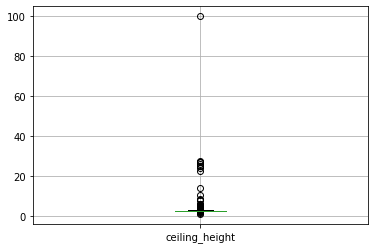

In [31]:
data.boxplot(column='ceiling_height')
plt.show()

In [32]:
data['ceiling_height'].value_counts()

2.65    6595
2.50    2137
2.60    1044
2.70    1009
3.00     771
        ... 
5.60       1
3.76       1
3.84       1
4.14       1
4.65       1
Name: ceiling_height, Length: 170, dtype: int64

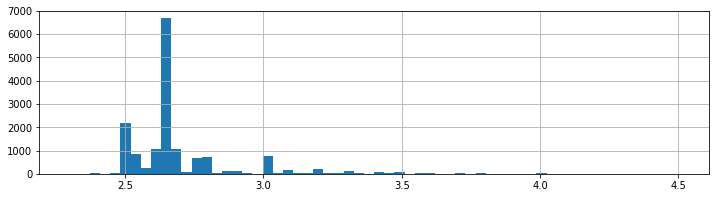

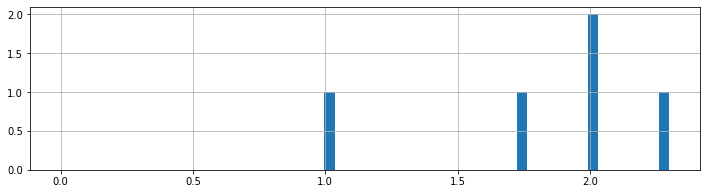

<AxesSubplot:>

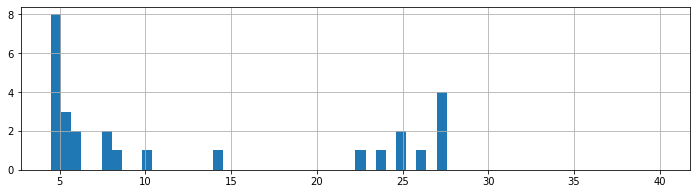

In [33]:
data['ceiling_height'].hist(figsize=(12,3), bins=60, range=(2.3, 4.5))
plt.show()
data['ceiling_height'].hist(figsize=(12,3), bins=60, range=(0,2.3))
plt.show()
data['ceiling_height'].hist(figsize=(12,3), bins=60, range=(4.5,40))

In [34]:
display(data.query('ceiling_height > 19 and ceiling_height < 38'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4643,0,4300000,45.0,2018-02-01,2,25.0,9.0,30.0,2,True,...,7.000000,1,Санкт-Петербург,12016.0,13256.0,1,658.0,1,331.0,181
5076,0,3850000,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.500000,0,Санкт-Петербург,29686.0,8389.0,3,397.0,1,578.0,7
5669,4,4400000,50.0,2017-08-08,2,26.0,9.0,21.3,3,True,...,7.000000,2,Санкт-Петербург,28981.0,10912.0,1,305.0,0,NaN,267
5807,17,8150000,80.0,2019-01-09,2,27.0,36.0,41.0,13,True,...,12.000000,5,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,38
17857,1,3900000,56.0,2017-12-22,3,27.0,5.0,33.0,4,False,...,9.804178,0,Санкт-Петербург,41030.0,15543.0,0,NaN,0,NaN,73
18545,6,3750000,43.0,2019-03-18,2,25.0,5.0,29.0,3,False,...,7.528208,0,Санкт-Петербург,27054.0,8033.0,1,540.0,0,NaN,12
20478,11,8000000,45.0,2017-07-18,1,27.0,4.0,22.0,2,True,...,10.000000,1,Санкт-Петербург,18975.0,3246.0,0,NaN,3,449.0,429
20507,12,5950000,60.0,2018-02-19,2,22.6,14.0,35.0,11,True,...,13.000000,1,Санкт-Петербург,27028.0,12570.0,0,NaN,0,NaN,40
21377,19,4900000,42.0,2017-04-18,1,27.5,24.0,37.7,19,False,...,11.000000,2,Санкт-Петербург,42742.0,9760.0,0,NaN,0,NaN,61


Исходя из представленных данных, речь идет об обычных квартирах с обычной высотой потолков 2-4 метра (Например, 26метровые потолки для апартаментов в 50 метров за 4,4 миллиона выглядят не очень реалистично). Представленные же двухзначные числа появились скорее всего из-за пропущенной точки между ними и это на самом деле вещественные значения. Поэтому необходимо разделить их на 10:

In [35]:
ceiling_list = data.query('ceiling_height > 19 and ceiling_height < 38').index
data.loc[ceiling_list, 'ceiling_height'] = data.loc[ceiling_list, 'ceiling_height'] / 10

In [36]:
print(data.loc[ceiling_list]['ceiling_height'])
print(data['ceiling_height'].tail(10))

4643     2.50
5076     2.40
5669     2.60
5807     2.70
17857    2.70
18545    2.50
20478    2.70
20507    2.26
21377    2.75
Name: ceiling_height, dtype: float64
23678    2.50
23681    2.50
23686    2.55
23687    2.65
23688    3.05
23689    2.86
23690    2.65
23691    2.75
23693    2.60
23697    3.00
Name: ceiling_height, dtype: float64


100метровый потолок в квартире выглядит как выброс, поэтому его необходимо удалить. Помимо этого, удалению подлежат некорректные значения меньше 2х метров и больше 7 метров:

In [37]:
ceiling_list = data.query('ceiling_height>38 or ceiling_height<2 or 7<ceiling_height<19').index

In [38]:
data.drop(ceiling_list, inplace=True, axis=0)

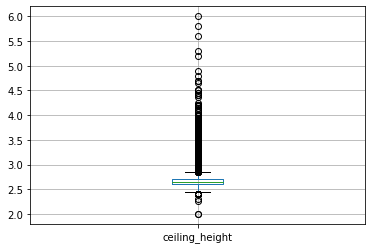

In [39]:
data.boxplot(column='ceiling_height')
plt.show()

2. total_images

In [40]:
display(data['total_images'].value_counts())

10    1162
9     1153
20    1064
8     1063
7     1014
6      965
11     908
5      838
12     817
0      759
13     683
14     661
4      635
15     631
1      607
3      512
16     503
17     457
2      443
19     406
18     404
23      13
21      10
22       8
24       7
28       4
26       4
50       3
32       3
30       2
27       2
35       2
31       2
37       1
29       1
42       1
25       1
Name: total_images, dtype: int64

<AxesSubplot:>

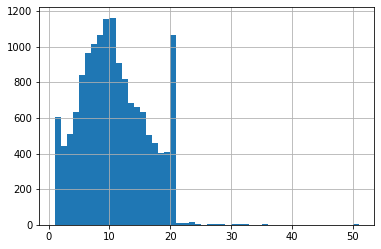

In [41]:
data['total_images'].hist(bins=50, range=(1,51))

Выбросов нет, всё корректно.

3. last_price

1      3350000
2      5196000
3     64900000
4     10000000
6      3700000
9      5400000
10     5050000
11     3300000
13     3550000
14     4400000
Name: last_price, dtype: int64 count    1.574900e+04
mean     7.203318e+06
std      1.214917e+07
min      1.219000e+04
25%      3.950000e+06
50%      5.100000e+06
75%      7.300000e+06
max      7.630000e+08
Name: last_price, dtype: float64


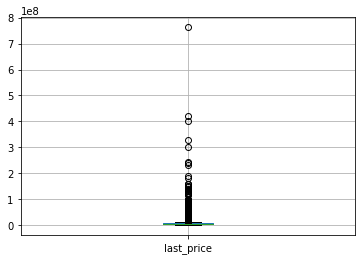

<AxesSubplot:>

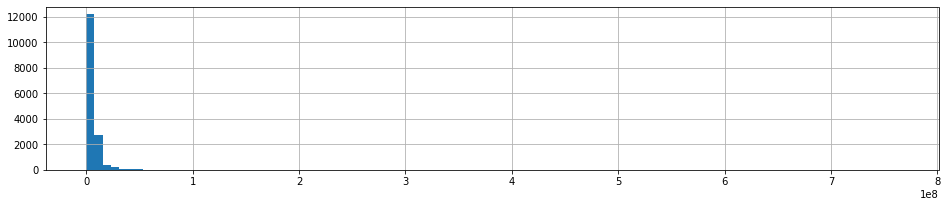

In [42]:
print(data['last_price'].head(10), data['last_price'].describe())
data.boxplot(column='last_price')
plt.show()
data['last_price'].hist(figsize=(16,3), bins=100)

Разброс значений слишком велик, поэтому необходимо посмотреть на более детальные гистограммы:

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

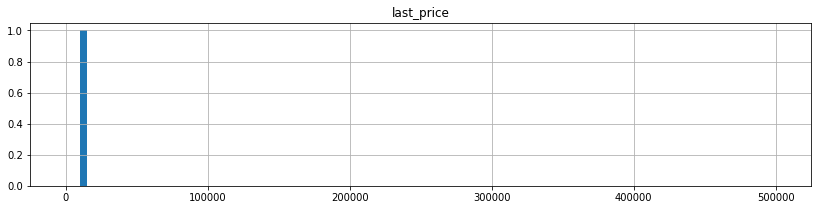

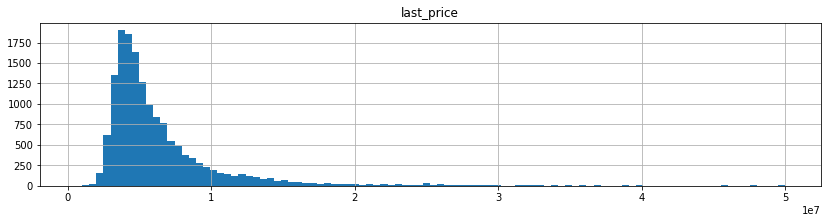

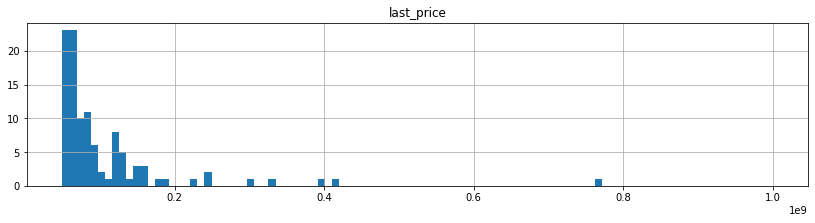

In [43]:
data.hist('last_price', bins=100, figsize=(14,3), range=(0, 500001))
data.hist('last_price', bins=100, figsize=(14,3), range=(500000, 50000001))
data.hist('last_price', bins=100, figsize=(14,3), range=(50000000, 1000000000))

По этим графикам видно, что в данных присутствуют выбросы. Удалим значения меньше 400000 и больше 1000000.

In [44]:
data = data.loc[(data['last_price']>400000) & (data['last_price']<100000000)]
data.reset_index(inplace=True, drop=True)
print(data.index)
print(data['last_price'].describe())

RangeIndex(start=0, stop=15717, step=1)
count    1.571700e+04
mean     6.828867e+06
std      6.524488e+06
min      1.190000e+06
25%      3.940000e+06
50%      5.100000e+06
75%      7.260000e+06
max      9.900000e+07
Name: last_price, dtype: float64


In [45]:
display(data.query('400000 > last_price and last_price < 100000000'))
display(data.tail())
print(data.index)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15712,13,3550000,35.30,2018-02-28,1,2.86,15.0,16.300000,4,True,...,9.1,2,Санкт-Петербург,17284.0,16081.0,1,353.0,2,652.0,29
15713,3,5500000,52.00,2018-07-19,2,2.65,5.0,31.000000,2,True,...,6.0,0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,NaN,15
15714,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.300000,7,True,...,10.6,1,Санкт-Петербург,19424.0,4489.0,0,NaN,1,806.0,519
15715,9,4600000,62.40,2016-08-05,3,2.60,9.0,40.000000,8,True,...,8.0,0,Петергоф,45602.0,34104.0,1,352.0,1,675.0,239
15716,13,11475000,76.75,2017-03-28,2,3.00,17.0,43.837596,12,True,...,23.3,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602


RangeIndex(start=0, stop=15717, step=1)


Выбросы удалены, данные реалистичны.

4. total_area

0     40.4
1     56.0
2    159.0
3    100.0
4     37.3
5     61.0
6     39.6
7     44.0
8     42.8
9     36.0
Name: total_area, dtype: float64 count    15717.000000
mean        61.073295
std         34.653689
min         12.000000
25%         40.600000
50%         52.300000
75%         70.700000
max        590.000000
Name: total_area, dtype: float64


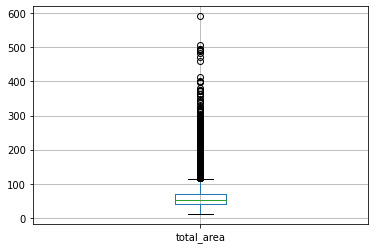

<AxesSubplot:>

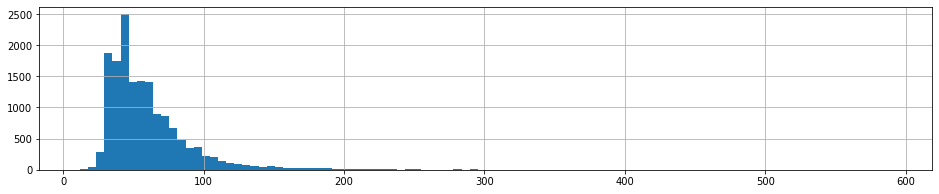

In [46]:
print(data['total_area'].head(10), data['total_area'].describe())
data.boxplot(column='total_area')
plt.show()
data['total_area'].hist(figsize=(16,3), bins=100)

Данные выглядят реалистично, остваим всё как есть.

5. first_day_exposition

In [47]:
print(data['first_day_exposition'].head(10))
print(data['first_day_exposition'].describe())

0   2018-12-04
1   2015-08-20
2   2015-07-24
3   2018-06-19
4   2017-11-02
5   2017-02-26
6   2017-11-16
7   2018-08-27
8   2017-07-01
9   2016-06-23
Name: first_day_exposition, dtype: datetime64[ns]
count                   15717
unique                   1439
top       2018-02-01 00:00:00
freq                      282
first     2014-11-27 00:00:00
last      2019-05-01 00:00:00
Name: first_day_exposition, dtype: object


/tmp/ipykernel_48/2728017678.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data['first_day_exposition'].describe())


В данных нет аномальных значений, оставляем всё как есть.

6. rooms

0    1
1    2
2    3
3    2
4    1
5    3
6    1
7    2
8    2
9    1
Name: rooms, dtype: int64 count    15717.000000
mean         2.083795
std          1.087325
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


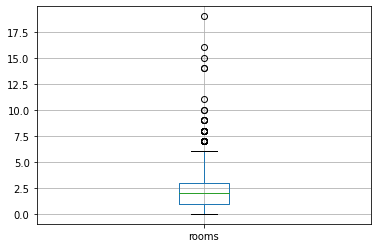

<AxesSubplot:>

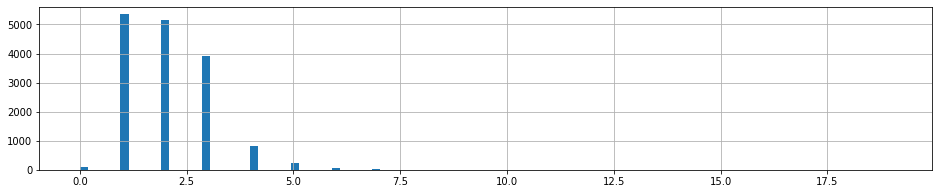

In [48]:
print(data['rooms'].head(10), data['rooms'].describe())
data.boxplot(column='rooms')
plt.show()
data['rooms'].hist(figsize=(16,3), bins=100)

Из представленных данных нелогично выглядит значение 0 комнат. Обратимся к площади квартир, к которым относятся эти нулевые значения.

In [49]:
print(data.query('rooms == 0')['total_area'].describe())

count    109.000000
mean      31.667523
std       34.367058
min       15.500000
25%       25.000000
50%       27.000000
75%       29.000000
max      371.000000
Name: total_area, dtype: float64


In [50]:
print(data.query('rooms==0 and total_area>28.4')['total_area'].sort_values())

14141     28.50
1979      28.90
804       29.00
13247     29.00
12381     29.00
10467     29.00
8630      29.00
6924      29.10
4847      29.20
3298      29.30
15177     30.00
1085      30.00
4869      30.00
11990     31.00
10499     31.00
9223      31.00
11891     31.10
805       32.00
10469     32.03
10461     32.20
4669      32.30
8137      32.40
11019     32.80
14369     34.00
337       34.40
3105      35.00
6014      38.30
10755     42.10
10204     43.30
6659      44.20
14098     71.00
2287      73.60
13364     98.40
12938    371.00
Name: total_area, dtype: float64


Рассчитаем средний метраж квартир, где 1,2,3 и 4 комнаты:

In [51]:
for n in range(1,5):
    print(f'{n} комнатная квартира:',data.query('rooms == @n')['total_area'].describe())
    print()

1 комнатная квартира: count    5344.000000
mean       38.048466
std        10.037476
min        12.000000
25%        32.600000
50%        37.000000
75%        41.620000
max       494.100000
Name: total_area, dtype: float64

2 комнатная квартира: count    5170.000000
mean       56.431907
std        13.165281
min        20.000000
25%        46.000000
50%        53.710000
75%        63.000000
max       196.000000
Name: total_area, dtype: float64

3 комнатная квартира: count    3908.000000
mean       78.537380
std        23.346493
min        40.100000
25%        62.000000
50%        74.000000
75%        88.800000
max       263.800000
Name: total_area, dtype: float64

4 комнатная квартира: count    836.000000
mean     107.125287
std       40.102702
min       48.000000
25%       80.000000
50%      100.000000
75%      124.025000
max      470.300000
Name: total_area, dtype: float64



Исходя из полученных данных:
* Все что ниже 40 кв.м - 1 комнатные квартиры
* от 40 до 60 кв.м - 2х комнатные квартиры
* от 60 до 80 кв.м 3х комнатыне квартиры
* от 80 кв.м 4х комнатные квартиры
* 371 кв.м удалим, так как сложно понять сколько здесь комнат, но 0 комнат быть по-прежнему не может

In [52]:
data.loc[(data['rooms']==0) & (data['total_area']<40), 'rooms'] = 1
data.loc[(data['rooms']==0) & (data['total_area']>40) & (data['total_area']<60), 'rooms'] = 2
data.loc[(data['rooms']==0) & (data['total_area']>60) & (data['total_area']<80), 'rooms'] = 3
data.loc[(data['rooms']==0) & (data['total_area']>80) & (data['total_area']<130), 'rooms'] = 4

In [53]:
data.drop(data.loc[(data['rooms']==0) & (data['total_area']==371)].index,inplace=True, axis=0)

In [54]:
data.reset_index(inplace=True, drop=True)

In [55]:
display(data.tail())
print(data.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15711,13,3550000,35.30,2018-02-28,1,2.86,15.0,16.300000,4,True,...,9.1,2,Санкт-Петербург,17284.0,16081.0,1,353.0,2,652.0,29
15712,3,5500000,52.00,2018-07-19,2,2.65,5.0,31.000000,2,True,...,6.0,0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,NaN,15
15713,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.300000,7,True,...,10.6,1,Санкт-Петербург,19424.0,4489.0,0,NaN,1,806.0,519
15714,9,4600000,62.40,2016-08-05,3,2.60,9.0,40.000000,8,True,...,8.0,0,Петергоф,45602.0,34104.0,1,352.0,1,675.0,239
15715,13,11475000,76.75,2017-03-28,2,3.00,17.0,43.837596,12,True,...,23.3,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15716 entries, 0 to 15715
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          15716 non-null  int64         
 1   last_price            15716 non-null  int64         
 2   total_area            15716 non-null  float64       
 3   first_day_exposition  15716 non-null  datetime64[ns]
 4   rooms                 15716 non-null  int64         
 5   ceiling_height        15716 non-null  float64       
 6   floors_total          15716 non-null  float64       
 7   living_area           15716 non-null  float64       
 8   floor                 15716 non-null  int64         
 9   is_apartment          15716 non-null  bool          
 10  studio                15716 non-null  bool          
 11  open_plan             15716 non-null  bool          
 12  kitchen_area          15716 non-null  float64       
 13  balcony         

7. floors_total

0    11.0
1     5.0
2    14.0
3    14.0
4    26.0
5     9.0
6    12.0
7     5.0
8     5.0
9     6.0
Name: floors_total, dtype: float64 count    15716.000000
mean        11.294541
std          6.577866
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


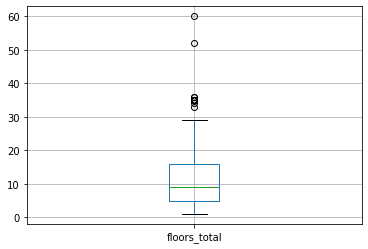

<AxesSubplot:>

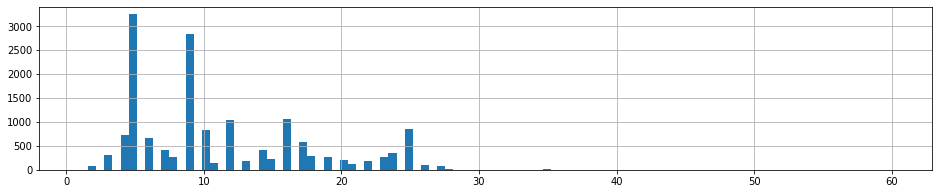

In [56]:
print(data['floors_total'].head(10), data['floors_total'].describe())
data.boxplot(column='floors_total')
plt.show()
data['floors_total'].hist(figsize=(16,3), bins=100)

In [57]:
print(data['floors_total'].value_counts())
display(data.query('floors_total.isna()').head(10))

5.0     3241
9.0     2824
16.0    1055
12.0    1036
25.0     858
10.0     824
4.0      732
6.0      670
17.0     577
7.0      414
14.0     409
24.0     348
3.0      314
18.0     294
23.0     264
8.0      261
19.0     257
15.0     234
20.0     197
13.0     187
22.0     176
11.0     134
21.0     119
26.0     104
27.0      75
2.0       69
35.0      18
28.0      13
1.0        5
36.0       2
33.0       1
52.0       1
34.0       1
29.0       1
60.0       1
Name: floors_total, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Данные в колонке floors_total не нуждаются в корректировке.

8. airports_nearest

0    12817.0
1    21741.0
2    28098.0
3    31856.0
4    52996.0
5    50898.0
6    38357.0
7    48252.0
8    37868.0
9    20782.0
Name: airports_nearest, dtype: float64 count    15694.000000
mean     28848.327131
std      12722.241678
min          0.000000
25%      18488.000000
50%      26794.500000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64


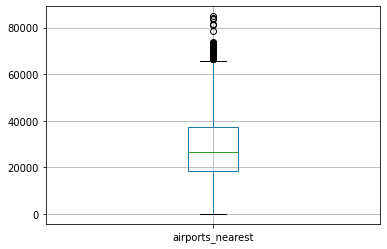

<AxesSubplot:>

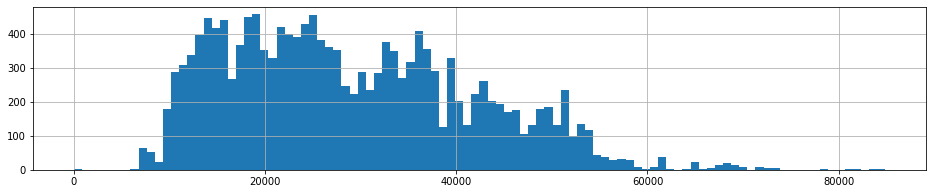

In [58]:
print(data['airports_nearest'].head(10), data['airports_nearest'].describe())
data.boxplot(column='airports_nearest')
plt.show()
data['airports_nearest'].hist(figsize=(16,3), bins=100)

В данном столбце аномалий не обнаружено, есть отсутвтующие данные, но их не критическое количество.

9. cityCenters_nearest

0    18603.0
1    13933.0
2     6800.0
3     8098.0
4    19143.0
5    15008.0
6    13878.0
7    51677.0
8    33058.0
9    30759.0
Name: cityCenters_nearest, dtype: float64 count    15716.000000
mean     14314.119878
std       8560.908833
min        208.000000
25%       9496.000000
50%      13171.000000
75%      16381.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


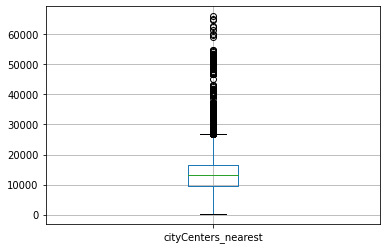

<AxesSubplot:>

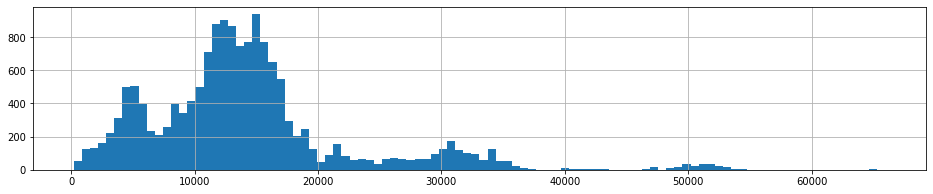

In [59]:
print(data['cityCenters_nearest'].head(10), data['cityCenters_nearest'].describe())
data.boxplot(column='cityCenters_nearest')
plt.show()
data['cityCenters_nearest'].hist(figsize=(16,3), bins=100)

<AxesSubplot:>

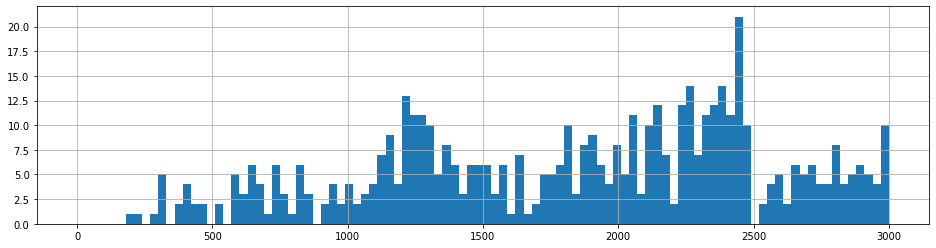

In [60]:
data['cityCenters_nearest'].hist(figsize=(16,4), bins=100, range=(0,3000))

Выбросов вроде нет, значения распределены равномерно

10. parks_around3000

In [61]:
data['parks_around3000'].value_counts(dropna=False)

0    8863
1    4836
2    1483
3     534
Name: parks_around3000, dtype: int64

Из этих данных логично предположить, что пропущенные значения - нули. Проставим их.

In [62]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
display(data['parks_around3000'].value_counts(dropna=False))
data['parks_around3000'] = data['parks_around3000'].astype(int)
print(data['parks_around3000'].dtype)

0    8863
1    4836
2    1483
3     534
Name: parks_around3000, dtype: int64

int64


11. parks_nearest

0      NaN
1     90.0
2     84.0
3    112.0
4      NaN
5      NaN
6    310.0
7      NaN
8    294.0
9      NaN
Name: parks_nearest, dtype: float64 count    6857.000000
mean      491.108065
std       345.111335
min         1.000000
25%       287.000000
50%       451.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64


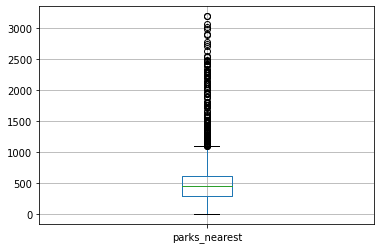

<AxesSubplot:>

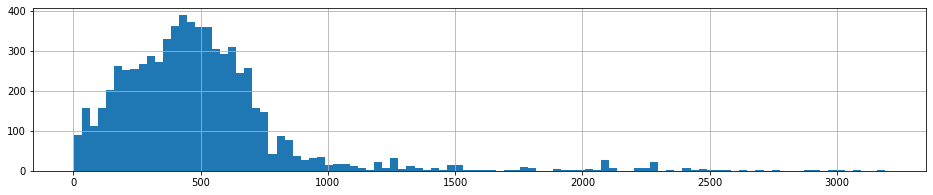

In [63]:
print(data['parks_nearest'].head(10), data['parks_nearest'].describe())
data.boxplot(column='parks_nearest')
plt.show()
data['parks_nearest'].hist(figsize=(16,3), bins=100)

<AxesSubplot:>

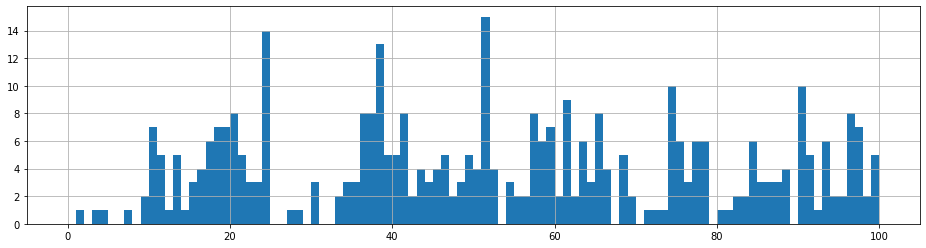

In [64]:
data['parks_nearest'].hist(figsize=(16,4), bins=100, range=(0,100))

<AxesSubplot:>

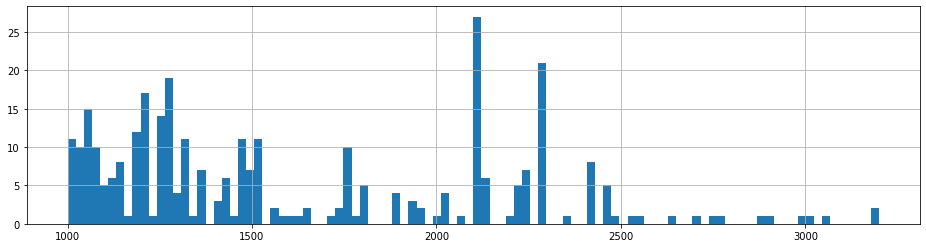

In [65]:
data['parks_nearest'].hist(figsize=(16,4), bins=100, range=(1000,3200))

Значения распределены равномерно, выбросов не обнаружено.

12. ponds_around3000

In [66]:
data['ponds_around3000'].value_counts(dropna=False)

0    7928
1    4921
2    1624
3    1243
Name: ponds_around3000, dtype: int64

Много отсутствующих значений. Также логично предположить, что на их метсе должен быть ноль.

In [67]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
display(data['ponds_around3000'].value_counts(dropna=False))
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
print(data['ponds_around3000'].dtype)

0    7928
1    4921
2    1624
3    1243
Name: ponds_around3000, dtype: int64

int64


13. ponds_nearest

0      NaN
1    574.0
2    234.0
3     48.0
4      NaN
5      NaN
6    553.0
7      NaN
8    298.0
9     96.0
Name: ponds_nearest, dtype: float64 count    7788.000000
mean      521.330380
std       277.488663
min        13.000000
25%       302.000000
50%       506.000000
75%       733.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


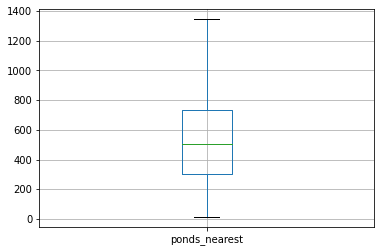

<AxesSubplot:>

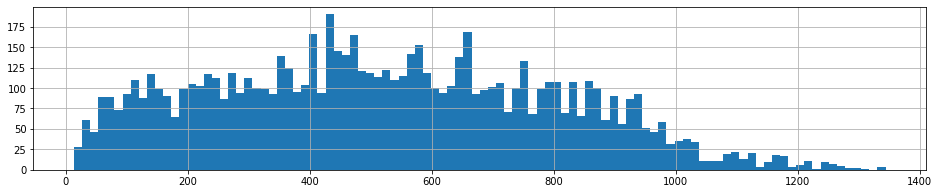

In [68]:
print(data['ponds_nearest'].head(10), data['ponds_nearest'].describe())
data.boxplot(column='ponds_nearest')
plt.show()
data['ponds_nearest'].hist(figsize=(16,3), bins=100)

Выбросов нет.

14. days_exposition

0     81
1    558
2    424
3    121
4    155
5    289
6    137
7      7
8    366
9    203
Name: days_exposition, dtype: int64 count    15716.000000
mean       182.090227
std        223.229217
min          1.000000
25%         43.000000
50%         96.000000
75%        232.000000
max       1572.000000
Name: days_exposition, dtype: float64


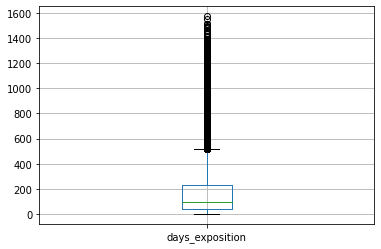

<AxesSubplot:>

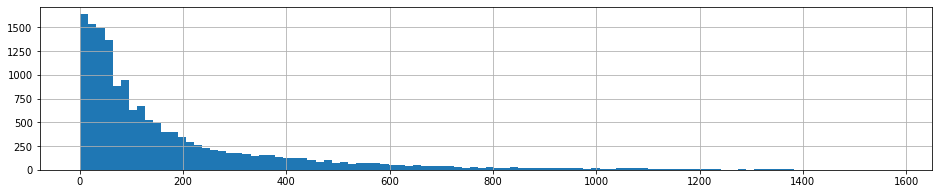

In [69]:
print(data['days_exposition'].head(10), data['days_exposition'].describe())
data.boxplot(column='days_exposition')
plt.show()
data['days_exposition'].hist(figsize=(16,3), bins=100)

In [70]:
data['locality_name'].value_counts(dropna=False)

Санкт-Петербург            13512
посёлок Шушары               404
Пушкин                       307
Колпино                      307
посёлок Парголово            302
Петергоф                     176
Сестрорецк                   163
Красное Село                 154
Ломоносов                    113
Кронштадт                     86
посёлок Металлострой          61
посёлок Стрельна              37
Павловск                      31
Зеленогорск                   21
посёлок Понтонный             17
посёлок Сапёрный               5
посёлок Песочный               4
посёлок Репино                 3
посёлок Молодёжное             3
посёлок Лисий Нос              2
посёлок Усть-Ижора             2
посёлок Александровская        2
посёлок Петро-Славянка         1
посёлок Левашово               1
поселок Лисий Нос              1
посёлок Белоостров             1
Name: locality_name, dtype: int64

Данные распределены равномерно, выбросов нет.

15. locality_name

In [71]:
print(data['locality_name'].value_counts())
print()
print(data['locality_name'].isna().sum())
print()
display(data['locality_name'].sort_values().unique())

Санкт-Петербург            13512
посёлок Шушары               404
Пушкин                       307
Колпино                      307
посёлок Парголово            302
Петергоф                     176
Сестрорецк                   163
Красное Село                 154
Ломоносов                    113
Кронштадт                     86
посёлок Металлострой          61
посёлок Стрельна              37
Павловск                      31
Зеленогорск                   21
посёлок Понтонный             17
посёлок Сапёрный               5
посёлок Песочный               4
посёлок Репино                 3
посёлок Молодёжное             3
посёлок Лисий Нос              2
посёлок Усть-Ижора             2
посёлок Александровская        2
посёлок Петро-Славянка         1
посёлок Левашово               1
поселок Лисий Нос              1
посёлок Белоостров             1
Name: locality_name, dtype: int64

0



array(['Зеленогорск', 'Колпино', 'Красное Село', 'Кронштадт', 'Ломоносов',
       'Павловск', 'Петергоф', 'Пушкин', 'Санкт-Петербург', 'Сестрорецк',
       'поселок Лисий Нос', 'посёлок Александровская',
       'посёлок Белоостров', 'посёлок Левашово', 'посёлок Лисий Нос',
       'посёлок Металлострой', 'посёлок Молодёжное', 'посёлок Парголово',
       'посёлок Песочный', 'посёлок Петро-Славянка', 'посёлок Понтонный',
       'посёлок Репино', 'посёлок Сапёрный', 'посёлок Стрельна',
       'посёлок Усть-Ижора', 'посёлок Шушары'], dtype=object)

Данные в этом столбце уже были обработаны, пропущенных и повторяющихся значений нет.

16. balcony

In [72]:
print(data['balcony'].value_counts())
print()
print(data['balcony'].isna().sum())

0    10147
1     2754
2     2454
5      198
4      114
3       49
Name: balcony, dtype: int64

0


Данные в этом столбце тоже были обработаны ранее, пропусков или необычных значений нет.

17. open_plan

In [73]:
print(data['open_plan'].value_counts(), " // Тип = ", data['open_plan'].dtype)

False    15680
True        36
Name: open_plan, dtype: int64  // Тип =  bool


С данными в этой колонке все в порядке, оставляем как есть.

18. studio

In [74]:
print(data['studio'].value_counts(), " // Тип = ", data['studio'].dtype)

False    15633
True        83
Name: studio, dtype: int64  // Тип =  bool


В этом столбце с данными также все в порядке.

19. is_apartment

In [75]:
print(data['is_apartment'].value_counts(), " // Тип = ", data['is_apartment'].dtype)

True     13819
False     1897
Name: is_apartment, dtype: int64  // Тип =  bool


И здесь с данными все в порядке.

20. floor

In [76]:
print(data['floor'].value_counts()) 

2     2074
3     2005
4     1818
1     1704
5     1658
6      947
7      864
8      793
9      778
10     503
12     393
11     383
13     272
14     237
15     230
16     228
17     160
18     121
19     113
21      91
20      84
22      78
23      77
24      45
25      35
26      15
27       6
28       1
33       1
32       1
31       1
Name: floor, dtype: int64


Все в порядке, оставляем.

21. living_area

0    18.600000
1    34.300000
2    90.816648
3    32.000000
4    10.600000
5    43.600000
6    20.300000
7    31.000000
8    27.000000
9    17.000000
Name: living_area, dtype: float64 count    15716.000000
mean        34.934585
std         21.989260
min          2.000000
25%         19.000000
50%         30.300000
75%         42.800000
max        409.000000
Name: living_area, dtype: float64


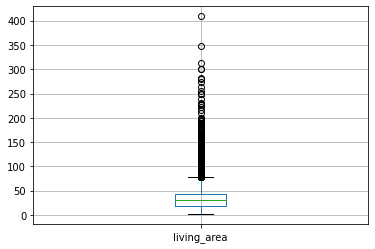

<AxesSubplot:>

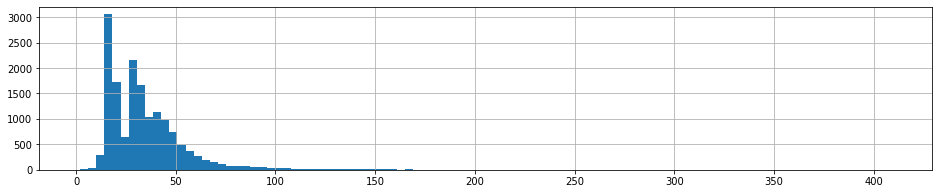

In [77]:
print(data['living_area'].head(10), data['living_area'].describe())
data.boxplot(column='living_area')
plt.show()
data['living_area'].hist(figsize=(16,3), bins=100)

Распределение данных достаточно равномерно, оставим как есть.

22. kitchen_area

0    11.000000
1     8.300000
2    27.836861
3    41.000000
4    14.400000
5     6.500000
6     8.500000
7     6.000000
8     5.200000
9     8.000000
Name: kitchen_area, dtype: float64 count    15716.000000
mean        10.650797
std          5.970657
min          2.000000
25%          7.000000
50%          9.400000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64


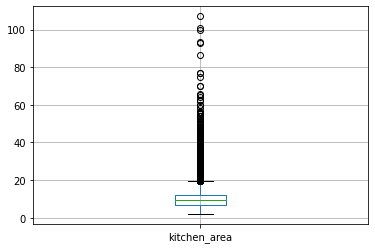

<AxesSubplot:>

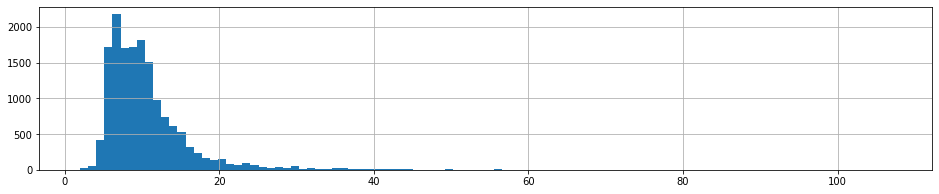

In [78]:
print(data['kitchen_area'].head(10), data['kitchen_area'].describe())
data.boxplot(column='kitchen_area')
plt.show()
data['kitchen_area'].hist(figsize=(16,3), bins=100)

В данных есть как очень маленькие, так и очень большие значения. Оставим реалистичные значения от 3 до 40 метров, а выбивающиеся заменим на эти предельные.

In [79]:
data.loc[(data['kitchen_area']<3) & (data['studio']==False), 'kitchen_area'] = 3
data.loc[(data['kitchen_area']>40) & (data['studio']==False), 'kitchen_area'] = 40

data.loc[(data['studio']==False),'kitchen_area'].describe()

count    15633.000000
mean        10.604000
std          5.375222
min          3.000000
25%          7.000000
50%          9.413761
75%         12.000000
max         40.000000
Name: kitchen_area, dtype: float64

Аномальных значений в датасете нет, отсутствующие значения логически заполнены, можно работать с данными.

### Посчитаем и добавим в таблицу новые столбцы

1. Цена одного квадратного метра

In [80]:
data['price_per_meter'] = data['last_price']/data['total_area']

In [81]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter
0,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.600000,1,True,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079
1,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.300000,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286
2,0,64900000,159.0,2015-07-24,3,2.65,14.0,90.816648,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.100629
3,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000
4,6,3700000,37.3,2017-11-02,1,2.65,26.0,10.600000,6,True,...,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,99195.710456
5,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.600000,7,True,...,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289,88524.590164
6,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.300000,3,True,...,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137,127525.252525
7,9,3300000,44.0,2018-08-27,2,2.65,5.0,31.000000,4,False,...,1,Ломоносов,48252.0,51677.0,0,NaN,0,NaN,7,75000.000000
8,20,3550000,42.8,2017-07-01,2,2.56,5.0,27.000000,5,True,...,1,Петергоф,37868.0,33058.0,1,294.0,3,298.0,366,82943.925234
9,1,4400000,36.0,2016-06-23,1,2.65,6.0,17.000000,1,True,...,0,Пушкин,20782.0,30759.0,0,NaN,1,96.0,203,122222.222222


2. Тип этажа квартиры(значения - "первый", "последний", "другой")

In [82]:
def floor_category(row):
    if row[8] == 1:
        return 'первый'
    elif row[8] == row[6]:
        return 'последний'
    else:
        return 'другой'

In [83]:
data['floor_category'] = data.apply(floor_category, axis = 1)

In [84]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,floor_category
0,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.600000,1,True,...,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079,первый
1,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.300000,4,True,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286,другой
2,0,64900000,159.0,2015-07-24,3,2.65,14.0,90.816648,9,True,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.100629,другой
3,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,True,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,другой
4,6,3700000,37.3,2017-11-02,1,2.65,26.0,10.600000,6,True,...,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,99195.710456,другой
5,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.600000,7,True,...,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289,88524.590164,другой
6,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.300000,3,True,...,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137,127525.252525,другой
7,9,3300000,44.0,2018-08-27,2,2.65,5.0,31.000000,4,False,...,Ломоносов,48252.0,51677.0,0,NaN,0,NaN,7,75000.000000,другой
8,20,3550000,42.8,2017-07-01,2,2.56,5.0,27.000000,5,True,...,Петергоф,37868.0,33058.0,1,294.0,3,298.0,366,82943.925234,последний
9,1,4400000,36.0,2016-06-23,1,2.65,6.0,17.000000,1,True,...,Пушкин,20782.0,30759.0,0,NaN,1,96.0,203,122222.222222,первый


3. День недели публикации объявления(0 - понедельник, 1 - вторник и т.д.)

In [85]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [86]:
data['weekday'].value_counts()

3    2913
1    2797
4    2720
2    2610
0    2319
5    1249
6    1108
Name: weekday, dtype: int64

4. Месяц публикации объявления

In [87]:
data['month'] = data['first_day_exposition'].dt.month

In [88]:
data['month'].value_counts()

2     1759
11    1677
10    1486
3     1482
9     1442
6     1286
8     1259
7     1207
4     1175
12    1077
1      960
5      906
Name: month, dtype: int64

5. Год публикации объявления

In [89]:
data['year'] = data['first_day_exposition'].dt.year

In [90]:
data['year'].value_counts()

2017    6186
2018    5569
2016    2098
2015     890
2019     874
2014      99
Name: year, dtype: int64

6. Расстояние до центра города в километрах(с округлением до целых значений)

In [91]:
data['cityCenters_nearest_km'] = data.loc[:, 'cityCenters_nearest'] / 1000

In [92]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()

In [93]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,floor_category,weekday,month,year,cityCenters_nearest_km
0,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.600000,1,True,...,NaN,0,NaN,81,82920.792079,первый,1,12,2018,19.0
1,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.300000,4,True,...,90.0,2,574.0,558,92785.714286,другой,3,8,2015,14.0
2,0,64900000,159.0,2015-07-24,3,2.65,14.0,90.816648,9,True,...,84.0,3,234.0,424,408176.100629,другой,4,7,2015,7.0
3,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,True,...,112.0,1,48.0,121,100000.000000,другой,1,6,2018,8.0
4,6,3700000,37.3,2017-11-02,1,2.65,26.0,10.600000,6,True,...,NaN,0,NaN,155,99195.710456,другой,3,11,2017,19.0
5,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.600000,7,True,...,NaN,0,NaN,289,88524.590164,другой,6,2,2017,15.0
6,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.300000,3,True,...,310.0,2,553.0,137,127525.252525,другой,3,11,2017,14.0
7,9,3300000,44.0,2018-08-27,2,2.65,5.0,31.000000,4,False,...,NaN,0,NaN,7,75000.000000,другой,0,8,2018,52.0
8,20,3550000,42.8,2017-07-01,2,2.56,5.0,27.000000,5,True,...,294.0,3,298.0,366,82943.925234,последний,5,7,2017,33.0
9,1,4400000,36.0,2016-06-23,1,2.65,6.0,17.000000,1,True,...,NaN,1,96.0,203,122222.222222,первый,3,6,2016,31.0


### Исследовательский анализ данных

<AxesSubplot:>

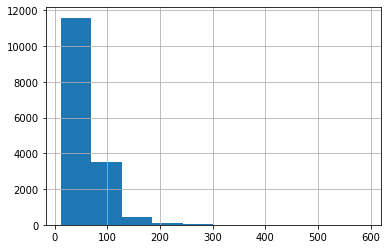

In [94]:
data['total_area'].hist()

Большая часть квартир имеет общую площадь до 70 квадратных метров(17500 квартир), после отметки в 120 метров, количество квартир стремится к нулю.

<AxesSubplot:>

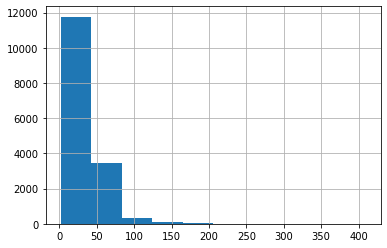

In [95]:
data['living_area'].hist()

Жилая площадь большинства квартир составляет 40 квадратных метров и меньше(17500). Квартир с жилой площадью больше 80 метров горадо меньше.

<AxesSubplot:>

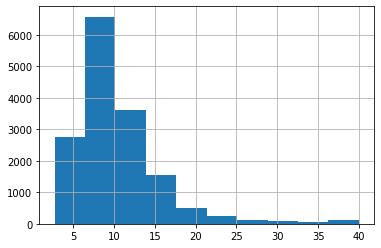

In [96]:
data['kitchen_area'].hist()

10000 квартир имеют площадь кухни 7-10 метров, более 5000 квартир имеют кухни размером 10-14 метров, более 4000 квартир имеют кухни 3-7 метров. Количество квартир с кухнями больше 20 метров стремится к нулю.

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

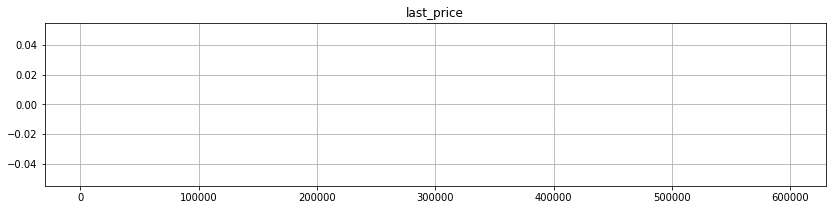

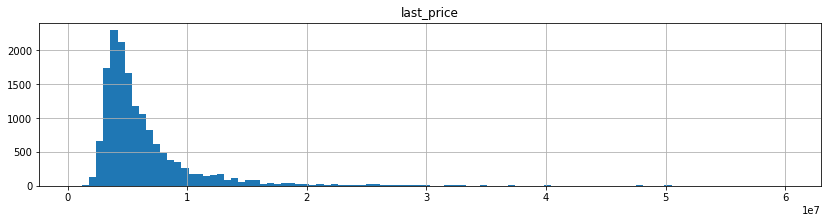

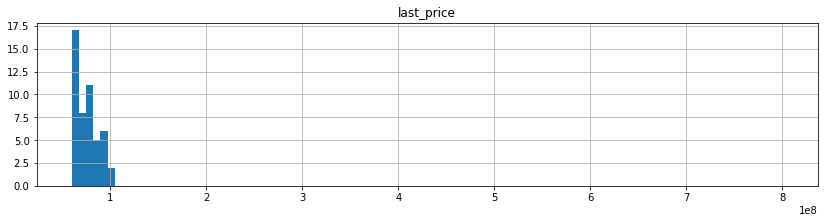

In [97]:
data.hist('last_price', bins=100, figsize=(14,3), range=(0, 600001))
data.hist('last_price', bins=100, figsize=(14,3), range=(600000, 60000001))
data.hist('last_price', bins=100, figsize=(14,3), range=(60000000, 800000000))

Распределение равномерно, основная масса данных надоится в диапазоне от 600000 до 60000001. Значений больше этого диапазона и меньше незначительное количество.

<AxesSubplot:>

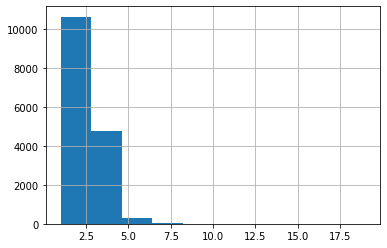

In [98]:
data['rooms'].hist()

Большая часть квартир(16000) имеет 1-2 комнаты. Около 7000 квартир имеют 3-4 комнаты. Большее число комнат у незначительного количества квартир.

<AxesSubplot:>

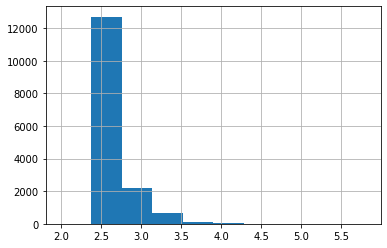

In [99]:
data['ceiling_height'].hist()

Средняя высота потолков большей части квартир (около 19000) - 2-2,5 метра. Около 3000 квартир имеют высоту потолков 2,5-3,2 метра. Потлки выше встречаются достаточно редко.

<AxesSubplot:>

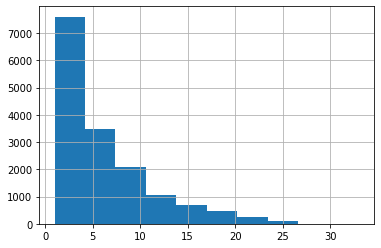

In [100]:
data['floor'].hist()

Большая часть квартир(12000) расположена на 1-4 этажах. Еще 5000 квартир расположено на 4-7 этажах. Далее количество квартир на этажах выше распределяется равномерно снижаясь, выше 27 этажа вариантов не представлено.

<AxesSubplot:>

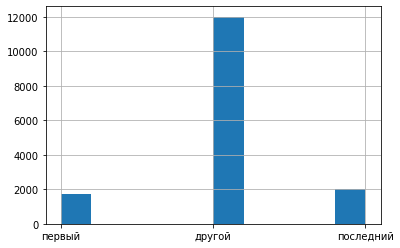

In [101]:
data['floor_category'].hist()

Квартир на первом или последнем этаже примерно одинаковое количество(2500-3000). Квартир на остальных этажах немногим меньше 17500.

<AxesSubplot:>

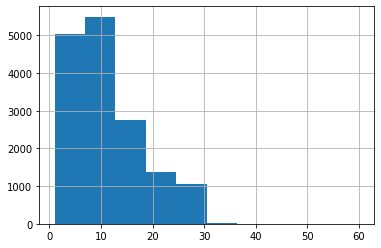

In [102]:
data['floors_total'].hist()

Наибольшее количество квартир продаются в домах, где меньше 7 этажей(около 9000). Около 7500 квартир представлено в домах, где 8-12 этажей. Значительно меньше, около 4000 вариантов в домах, где 13-19 этажей. Выше 35этажных домов в выборке не представлено.

<AxesSubplot:>

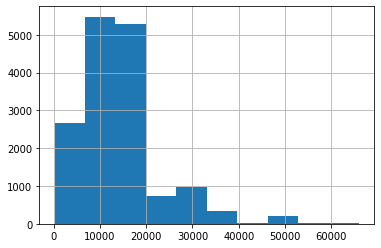

In [103]:
data['cityCenters_nearest'].hist()

Чуть больше 6000 квартир расположены в 8-12 км от центра, еще 6000 квартир - в 13-20 км. Немногим больше 3000 квартир расположены близко к центру - в 8 километрах и ближе. Оставшаяся меньшая часть квартир находится в 20 км от центра и дальше. 

<AxesSubplot:>

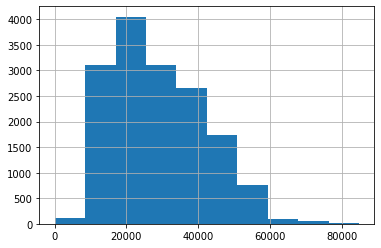

In [104]:
data['airports_nearest'].hist()

Около 4500 квартир находится в 18-23 км от аэропорта. По 3500 вариантов находится в 10-17 и в 23-25 км от аэропорта. Далее распределение достаточно равномерное. Близкое к нулю количество квартир находится вблизи аэропорта(до 8 км) и достаточно далеко от него(более 60 км).

<AxesSubplot:>

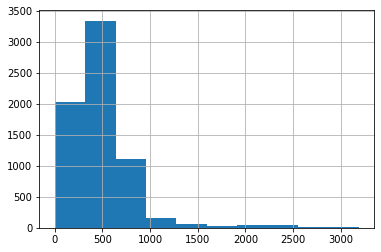

In [105]:
data['parks_nearest'].hist()

Большая часть квартир находится в 400-600 метрах от ближайшего парка. Чуть менее 2500 квартир находится либо непосредственно рядом с парком, либо на расстоянии до 300 метров. Еще чуть больше 1000 кварттр находится в 700-1200 метрах от парка. Квартир, располагающихся от парка на большем расстоянии крайне мало. 

<AxesSubplot:>

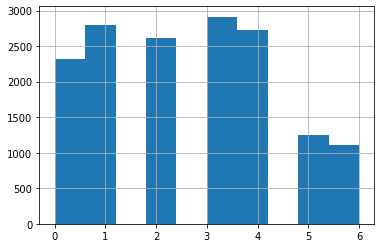

In [106]:
data['weekday'].hist()

Большая часть квартир (по 4000 с небольшим) продается в понедельник и среду. Еще по 4000 объявлений были размещены во вторник и четверг. 3500 объявлений были размещены в воскресенье. И самые непопулярные дни для размещения объявлений - пятница и суббота(по 1500-1700 объявлений).

<AxesSubplot:>

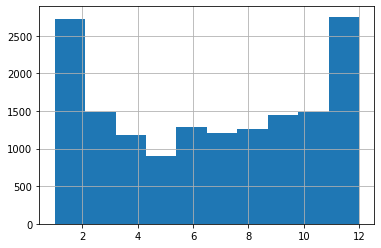

In [107]:
data['month'].hist()

Чаще всего размещают объявления о продаже квартир в начале и конце года - по 4000 объявлений в январе и декабре. Реже всего квартиры продают в мае - около 1200 квартир. В оставшиеся месяцы количесвто опубликованных объявлений не сильно различается - от 1700 до 2500 объявлений в среднем.

Изучим, как быстро продавались квартиры.

0     81
1    558
2    424
3    121
4    155
5    289
6    137
7      7
8    366
9    203
Name: days_exposition, dtype: int64 count    15716.000000
mean       182.090227
std        223.229217
min          1.000000
25%         43.000000
50%         96.000000
75%        232.000000
max       1572.000000
Name: days_exposition, dtype: float64


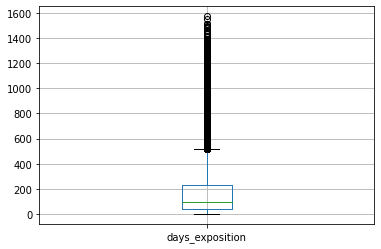

<AxesSubplot:>

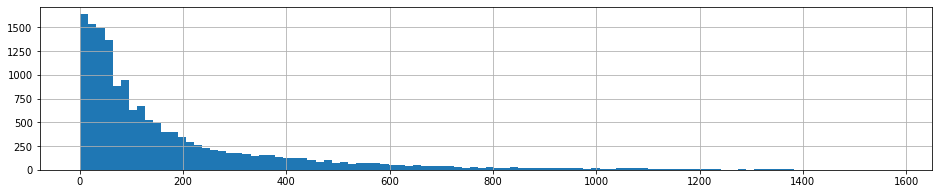

In [108]:
print(data['days_exposition'].head(10), data['days_exposition'].describe())
data.boxplot(column='days_exposition')
plt.show()
data['days_exposition'].hist(figsize=(16,3), bins=100)

<AxesSubplot:>

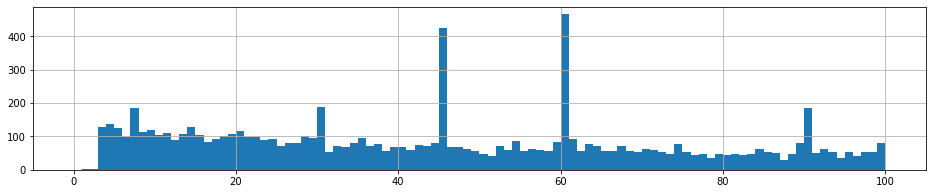

In [109]:
data['days_exposition'].hist(range=(0,100),figsize=(16,3), bins=100)

<AxesSubplot:>

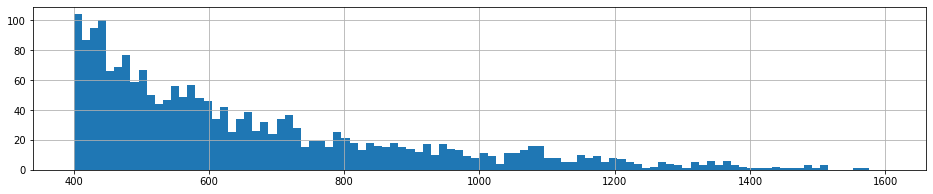

In [110]:
data['days_exposition'].hist(range=(400,1600),figsize=(16,3), bins=100)

In [111]:
print('Медиана =', data['days_exposition'].median())
print('Средняя =', data['days_exposition'].mean())

Медиана = 96.0
Средняя = 182.0902265207432


Из вышеприведенной гистограммы можно сделать вывод, что продажа квартиры в среднем занимает от 3 до 6 месяцев(первая гистограмма). Все что продается раньше 40 дней можно назвать быстрой продажей (находится до первого пика средней гистограммы). Необычайно долгие продажи начинаются от 2 лет (нижняя гистограмма)

Выясним, какие факторы больше всего влияют на общую стоимость объекта.

Зависимость от общей площади:

Корелляция цены от total_area 0.7730436818956791


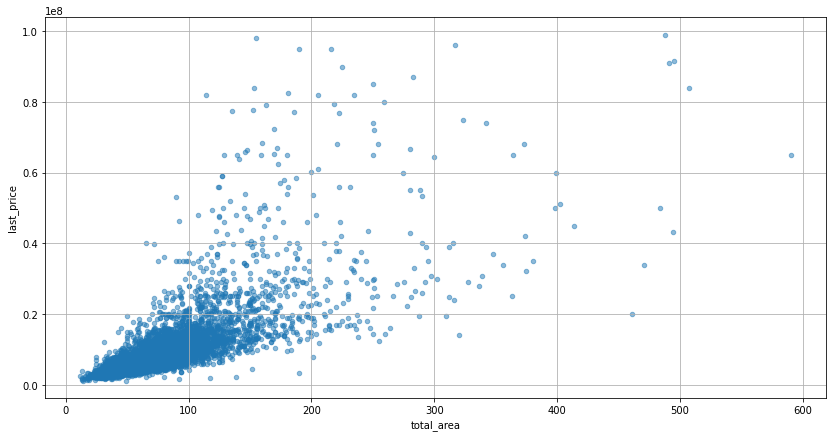

In [112]:
def corr1(column):
    print('Корелляция цены от',column , data['last_price'].corr(data[column]))
    data.plot(x=column, y='last_price', kind='scatter', grid=True, figsize=(14,7), alpha=0.5);

corr1('total_area')

Из графика видно , что зависимость цены от площади есть, хоть и не сильная. При возрастании площади и цена возрастает

Зависимость от жилой площади:

Корелляция цены от living_area 0.6909323327874154


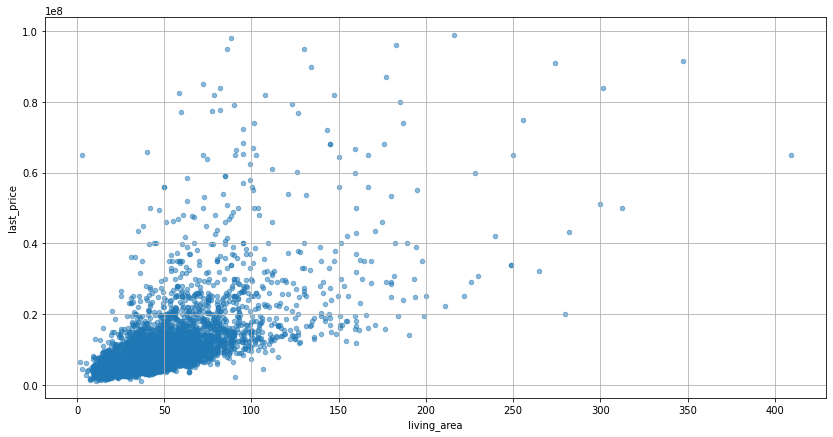

In [113]:
corr1('living_area')

Такая же ситуация и с жилой площадью. Корреляция есть, но не очень сильная

Зависимость от площади кухни:

Корелляция цены от kitchen_area 0.5962723017822252


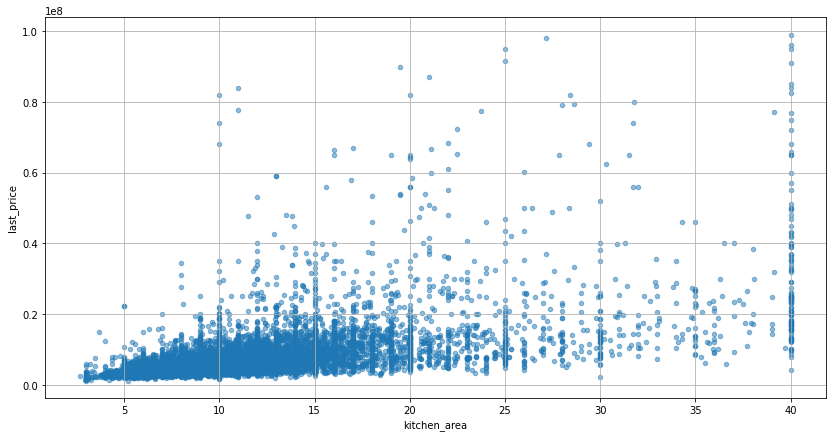

In [114]:
corr1('kitchen_area')

Корреляция между площадью кухни и стоимостью квартиры еще ниже, но все же, некоторая зависимость присуттвует.

Зависимость от количества комнат:

Корелляция цены от rooms 0.490756736066163


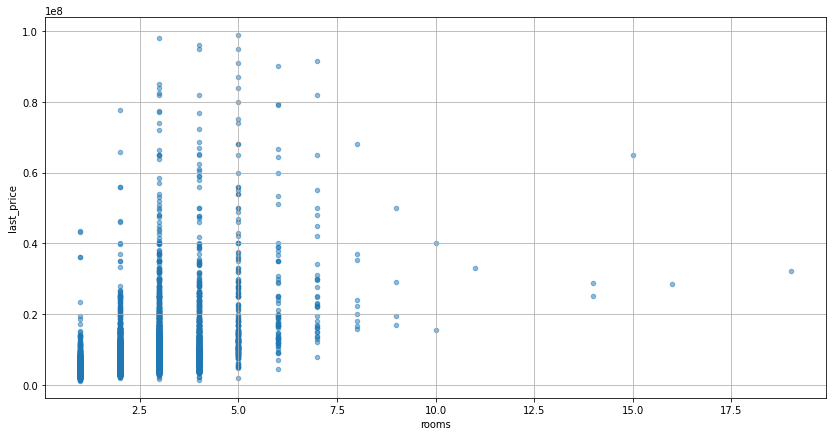

In [115]:
corr1('rooms')

Из графика видно , что зависимость цены от кол-ва комнат слабо прослеживается. Она увеличивается, при возрастании комнат от 1 до 3. Очень много квартир от 1 до 6 комнат в диапазоне до 30 млн - это показывает что зависимость все-таки довольно слаба и в квартирах от 3 комнат уже отсутствует.

Зависимость от этажа, на котором расположена квартира:

Корелляция цены от floor 0.0007995005095817343


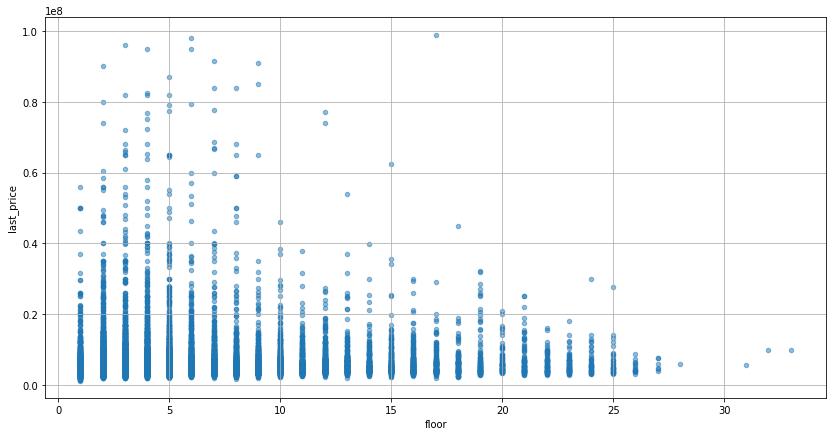

In [116]:
corr1('floor')

Зависимость этажа от стоимости не очень сильная, но снова она есть. Из графика видно, что первый этаж любят меньще, чем 2-5. Однако, еще ниже цена на очень высокие этажи - 10й и выше.

Зависимость от даты размещения:

<AxesSubplot:xlabel='weekday', ylabel='last_price'>

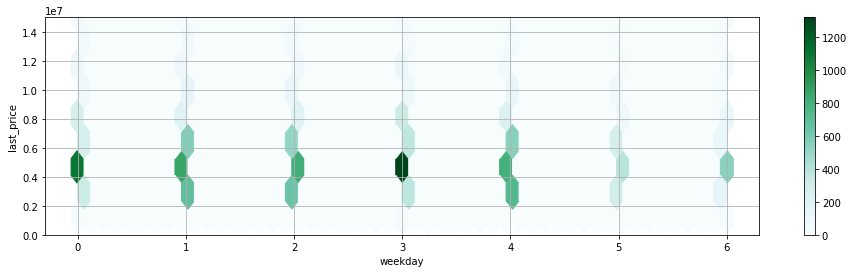

In [118]:
data.plot(x='weekday', y='last_price', kind='hexbin', gridsize=50, sharex=False, grid=True, figsize=(16,4),ylim=(0,15000000))

<AxesSubplot:xlabel='month', ylabel='last_price'>

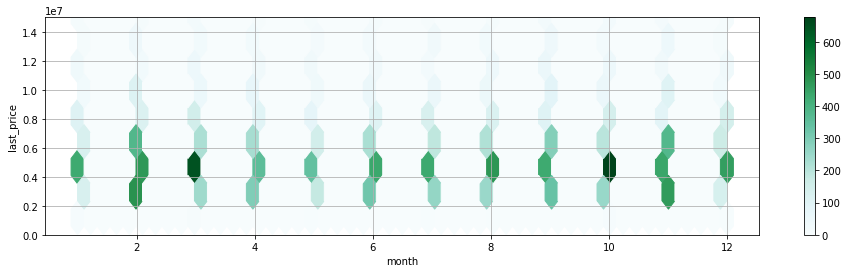

In [119]:
data.plot(x='month', y='last_price', kind='hexbin', gridsize=50, sharex=False, grid=True, figsize=(16,4),ylim=(0,15000000))

<AxesSubplot:xlabel='year', ylabel='last_price'>

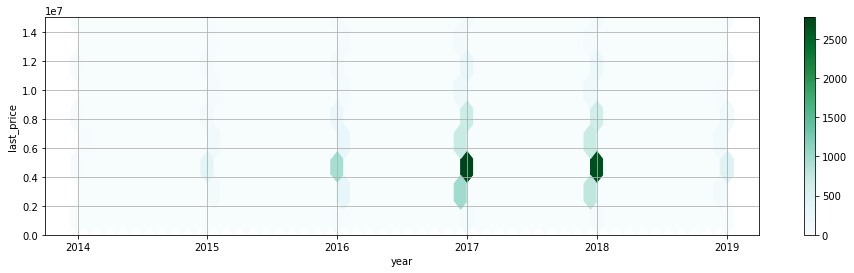

In [120]:
data.plot(x='year', y='last_price', kind='hexbin', gridsize=50, sharex=False, grid=True, figsize=(16,4),ylim=(0,15000000))

Из вышеприведенных графиков можно сделать вывод, что нет зависимости цены квартиры от дня, месяца и года, в который они продаются.

Посчитаем среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений. 

In [123]:
loc10 = data.groupby('locality_name')['price_per_meter'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)
loc10.columns = ['flats', 'price_per_meter']
loc10.reset_index(inplace=True)
print(loc10)
print()
print('ВЫВОД:')
print('Населённый пункт, где cамая низкая стоимость жилья')
print(loc10.loc[loc10['price_per_meter']==loc10['price_per_meter'].min()])
print()
print('Населённый пункт, где cамая высокая стоимость жилья')
print(loc10.loc[loc10['price_per_meter']==loc10['price_per_meter'].max()])

       locality_name  flats  price_per_meter
0    Санкт-Петербург  13512    111057.540557
1     посёлок Шушары    404     77784.479585
2            Колпино    307     74839.306353
3             Пушкин    307    102074.629153
4  посёлок Парголово    302     89505.043917
5           Петергоф    176     83267.186375
6         Сестрорецк    163    101232.408917
7       Красное Село    154     71718.373287
8          Ломоносов    113     71182.520639
9          Кронштадт     86     79151.503392

ВЫВОД:
Населённый пункт, где cамая низкая стоимость жилья
  locality_name  flats  price_per_meter
8     Ломоносов    113     71182.520639

Населённый пункт, где cамая высокая стоимость жилья
     locality_name  flats  price_per_meter
0  Санкт-Петербург  13512    111057.540557


Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого метра:

In [124]:
print('Питер - ЦЕНТР')
spb_center = data.query('cityCenters_nearest < 8000 ')
display(spb_center.sample(3))
print()
print('Питер - ВЕСЬ')
spb_all = data.query(' locality_name == "Санкт-Петербург" ')
display(spb_all.sample(3))

Питер - ЦЕНТР


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,floor_category,weekday,month,year,cityCenters_nearest_km
5448,14,5700000,57.0,2017-04-27,3,2.65,5.0,41.0,3,True,...,NaN,0,NaN,123,100000.000000,другой,3,4,2017,6.0
13920,7,18055216,118.0,2016-10-12,4,2.65,12.0,70.0,5,True,...,NaN,0,NaN,238,153010.305085,другой,2,10,2016,5.0
12864,16,9800000,102.4,2016-07-08,4,3.30,5.0,72.3,3,True,...,295.0,0,NaN,540,95703.125000,другой,4,7,2016,6.0



Питер - ВЕСЬ


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,floor_category,weekday,month,year,cityCenters_nearest_km
14186,9,4850000,62.2,2017-08-12,3,2.65,9.0,43.0,5,True,...,623.0,0,NaN,91,77974.276527,другой,5,8,2017,11.0
4058,15,4300000,35.5,2018-11-10,1,2.65,14.0,21.5,6,True,...,NaN,1,1053.0,15,121126.760563,другой,5,11,2018,13.0
13073,20,3000000,30.7,2017-05-10,1,2.70,5.0,15.0,2,False,...,566.0,0,NaN,103,97719.869707,другой,2,5,2017,11.0


In [125]:
spb = data.loc[data['locality_name']=='Санкт-Петербург',['last_price', 'cityCenters_nearest']].reset_index(drop=True)
spb['dist_center_km'] = round(spb['cityCenters_nearest']/1000)
print(spb.sample(10))

       last_price  cityCenters_nearest  dist_center_km
1865      3650000              15612.0            16.0
10840     5300000               6460.0             6.0
2604      3400000              12446.0            12.0
10641    11600000               7044.0             7.0
7693      5350000               2885.0             3.0
4682      6750000              23102.0            23.0
8012      7600000              13943.0            14.0
10633     8400000              13998.0            14.0
3918      4400000               9496.0             9.0
6051      5150000              13460.0            13.0


In [126]:
price_km_spb = spb.pivot_table(index='dist_center_km', values='last_price', aggfunc='mean')
price_km_spb.head(10)

,last_price
dist_center_km,
0.0,2.323237e+07
1.0,1.488293e+07
2.0,1.425070e+07
3.0,1.038257e+07
4.0,1.097547e+07
5.0,1.229838e+07
6.0,1.314883e+07
7.0,1.289304e+07
8.0,8.605423e+06


<AxesSubplot:xlabel='dist_center_km'>

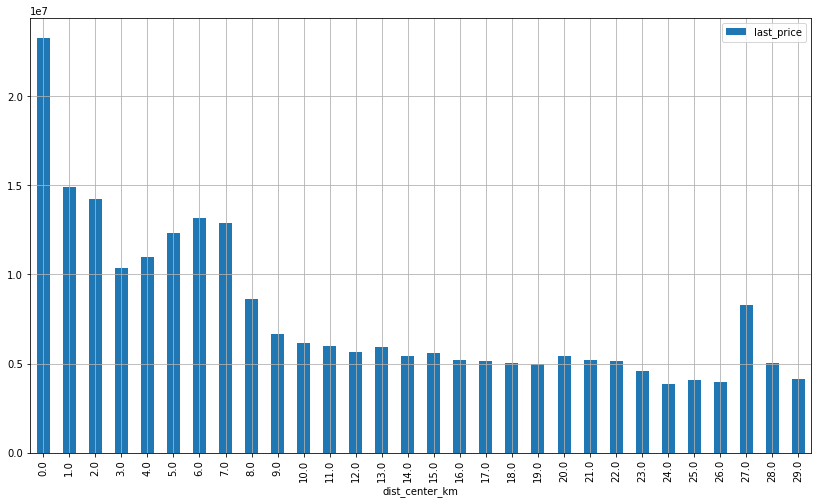

In [127]:
price_km_spb.plot(kind='bar', grid=True, figsize=(14,8))

ИЗ данных гистограммы видно, что на расстоянии до 1 км от центра цена очень высока (около 26,5 млн.р за квартиру) и сильно меняется уже после 1 км. от центра (16,3 млн.р за квартиру), все, что в радиусе до 1 км от центра - можно назвать именно самым центром.
Есть еще одна граница, она находится в районе 8 км от самого центра, после которой следует сильное падение цены (с 14млн до 9млн) и после начинает убывать постепенно. Это и есть центральный район(в радиусе 8 км отцентра).
Можно называть обе эти ттерритории центром.

### Общий вывод

В результате анализа датасета с информаией о продаже квартир в Санкт-Петербургебыли сделаны следующие выводы:
* Больше всего квартир с площадями 30-46 кв.м - это самые популярные 1 и 2-х комнатные. Далее идут скорее всего 2 и 3 комнатные с площадью до 75 кв.м. Больше всего квартир продаются по цене в диапазоне 1,8-7,5 млн.руб. Пик же продажи квартир идет в по цене около 3,8 мнн.
* Самые популярные квартиры - 1комнатная(чуть больше 8000) и 2комнатные(около 8000). 3комнатных тоже довольно много - чуть меньше 6000, ну а дальше кол-во сильно сокращаетя.
* Больше всего квартир с высотой потолков 250 - 300 см, подавляющее большинство почти половина с высотой 265 см.

* Факторы больше всего влияющие на стоимость квартиры: 
* Больше всего на стоимость квартиры влияет её площадь(прямопропорцианальная зависимость). 
* Среднее влияние оказывает удаленность от центра(обратнопропорцианальная зависимость) и количество комнат (особенно хорошо видна прямопропорцианальная зависимость на отрезке 1-3 комнаты, все что выше уже не коррелирует). 
* Также надо отметить, что есть зависимость от этажа - первый этаж мало кто любит и цена его существенно отличается от остальных; люди предпочитают не первый и не последний этаж - его цена выше(но на немного выше последнего).

* В ходе анализа квартир в центре Питера было выявлено - что на расстоянии ДО 1 (это 0 км) км от центра цена очень высока (около 26,5 млн.р за квартиру) и сильно меняется уже после 1 км. от центра (16,3 млн.р за квартиру), все, что в радиусе до 1 км от центра - это и есть "самый центр". Есть еще одна граница, она находится в районе 8 км от самого центра, после которой следует сильное падение цены (с 14млн до 9млн) и после начинает убывать постепенно. Это и есть центральная зона (в радиусе 8 км от центра). Будем называть обе территории вместе - Центр.

* Доля проданных квартир с большой площадью в Центре значительно выше, нежели по всему Городу. Конечно же цена на квартиры выше в Центре, чем в Городе. Большая доля продаж в Центре приходится на 2-х и 3-х комнатные квартиры, а по Городу на 1-а и 2-х комнатные. Также можно видеть, что в Центре доля проданых квартир с высокими потолками - 3м высока, а в Городе высока доля с высотой 2,5м. Но подавляющее большинство и там и там идет по высоте 2,65м
* Если в Городе есть слабая зависимость от расстояния от центра, то в Центре такой зависимости нет.